In [7]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
img_array = cv2.imread("Training1/Closed_Eyes/s0001_00056_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

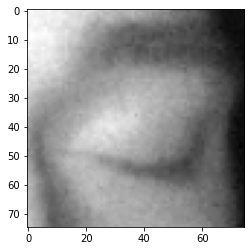

In [9]:
plt.imshow(img_array,cmap="gray")

In [10]:
img_array.shape

(75, 75)

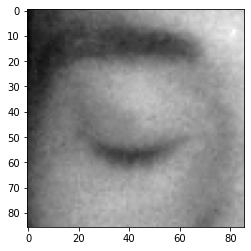

In [11]:
Data = "Training1/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Data , category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        bactorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

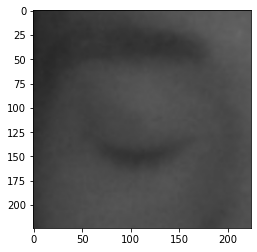

In [12]:
img_size = 224
new_array = cv2.resize(bactorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [13]:

training = []
def create_training_data():
    for category in Classes:
        path = os.path.join(Data,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                bactorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(bactorgb,(img_size,img_size))
                training.append([new_array,class_num])
            except Exception as e:
                pass

In [14]:
create_training_data()

In [15]:
print(len(training))

2309


In [16]:
import random
random.shuffle(training)

In [17]:
X = []
y = []
for features , label in training:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size , img_size , 3)

In [12]:
X.shape

(2309, 224, 224, 3)

In [13]:
X = X/255.0;

In [14]:
Y = np.array(y)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.mobilenet.MobileNet()

In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-4].output

In [20]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [23]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [24]:
new_model.fit(X,Y,epochs = 1, validation_split = 0.1)

65/65 [==============================] - 886s 13s/step - loss: 0.0658 - accuracy: 0.9647 - val_loss: 3.4657 - val_accuracy: 0.6017


In [25]:
new_model.save("dd1.h5")

In [18]:
new_model = tf.keras.models.load_model("mymodel.h5")

# Prediction

In [19]:
img_size = 224
img_array = cv2.imread('s0026_00500_0_0_1_0_1_01.png',cv2.IMREAD_GRAYSCALE)
bactorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(bactorgb,(img_size,img_size))


In [20]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [21]:
X_input.shape

(1, 224, 224, 3)

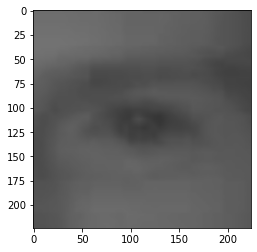

In [22]:
plt.imshow(new_array)

In [23]:
X_input = X_input/255.0

In [24]:
prediction = new_model.predict(X_input)

In [10]:
prediction

array([[0.00048479]], dtype=float32)

In [11]:
img = cv2.imread('i2.jpg')

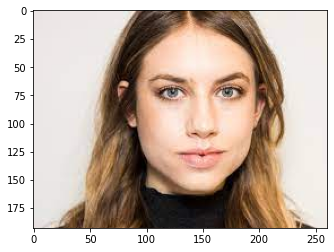

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [14]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [16]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [17]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w , y+h) , (0,255,0),2)
    

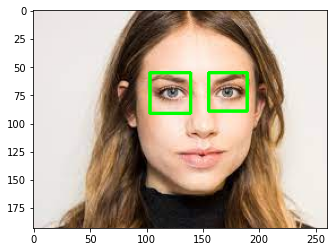

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [42]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    roi_gray = gray[y:y+h , x : x+w]
    roi_color = img[y:y+h , x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    print(eyess)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for(ex , ey , ew , eh) in eyess:
            eyes_roi = roi_color[ey:ey + eh , ex:ex + ew]
            

[[ 5  4 25 25]]
[[ 4  5 24 24]]


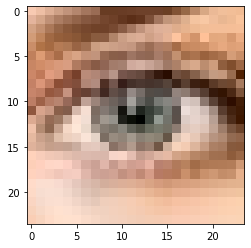

In [20]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [21]:
eyes_roi.shape

(24, 24, 3)

In [22]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [23]:
final_image.shape

(1, 224, 224, 3)

In [24]:
new_model.predict(final_image)

array([[0.99987066]], dtype=float32)

In [8]:
import winsound 

frequency = 2500
duration = 1000


path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")

counter = 0
while True:
    ret , frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        roi_gray = gray[y:y+h , x : x+w]
        roi_color = frame[y:y+h , x:x+w]
        cv2.rectangle(frame, (x,y), (x+w , y+h) , (0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            print("Eyes are detected.")
            for(ex , ey , ew , eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh , ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions >0.5):
        status = "Open Eyes"
        cv2.putText(frame,
                   status,
                   (150,150),
                   font , 3,
                    (0,255,0),
                    2,
                    cv2.LINE_4
                   )
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
        cv2.putText(frame, 'Active',(x1+int(w1/10) , y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,255,0),2)
        
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                   status,
                   (150,150),
                   font , 3,
                    (0,255,0),
                    2,
                    cv2.LINE_4
                   )
        cv2.rectangle(frame,(x,y),(x+W,y+h),(0,0,255),2)
        if counter > 5:
            x1,y1,w1,h1 = 0,0,175,75
        
            cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1),(0,0,0),-1)
            cv2.putText(frame, 'Sleep Alert !!',(x1+int(w1/10) , y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7 , (0,255,0),2)
            winsound.Beep(frequency,duration)
            counter = 0
        
        
    
    
    cv2.imshow("Drowsiness Detection",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

    
        
        
                
    
            

False


NameError: name 'eyes_roi' is not defined

In [ ]:
cap.release()
cv2.destroyAllWindows()
